# Projeto 1: Análise de Vendas de uma Loja de Varejo

## Objetivo:

Realizar a manipulação e limpeza dos dados de vendas e criar visualizações para entender o desempenho da loja.

### 1. Obtenção dos Dados:

- Baixe um dataset de vendas de varejo. Você pode usar o dataset de Vendas de Varejo do Kaggle.

### 2. Exploração Inicial dos Dados:

- Carregue os dados usando Pandas.
- Exiba as primeiras linhas e verifique a estrutura do DataFrame.
- Obtenha informações básicas: tipos de dados, valores ausentes, estatísticas descritivas.

In [30]:
import pandas as pd
import seaborn as sns

In [18]:
df_vendas_varejo = pd.read_csv("dataset_vendas.csv")

In [19]:
df_vendas_varejo.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [20]:
df_vendas_varejo.shape

(9700, 11)

In [21]:
df_vendas_varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [22]:
df_vendas_varejo.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [23]:
df_vendas_varejo.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


### 3. Limpeza dos Dados:

- Identifique e trate dados ausentes.
- Corrija tipos de dados incorretos.
- Remova duplicatas.
- Trate valores anômalos.

In [24]:
df_vendas_varejo.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [26]:
df_vendas_varejo["Data_Pedido"] = pd.to_datetime(df_vendas_varejo["Data_Pedido"])

C:\Users\ruben\AppData\Local\Temp\ipykernel_16312\536740102.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_vendas_varejo["Data_Pedido"] = pd.to_datetime(df_vendas_varejo["Data_Pedido"])


In [28]:
df_vendas_varejo = df_vendas_varejo.drop_duplicates()

In [29]:
df_vendas_varejo.shape

(9700, 11)

<Axes: xlabel='Valor_Venda'>

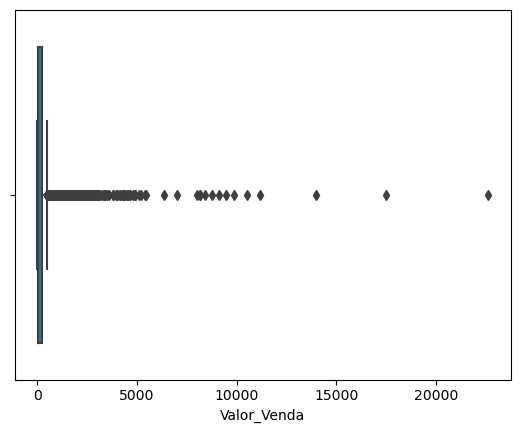

In [31]:
sns.boxplot(x=df_vendas_varejo["Valor_Venda"])

In [39]:
Q1 = df_vendas_varejo["Valor_Venda"].quantile(0.25)
Q3 = df_vendas_varejo["Valor_Venda"].quantile(0.5)

In [40]:
IQR = q3 - q1
IQR

37.024

In [47]:
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

limite_superior

109.80799999999999

In [48]:
outliers = df_vendas_varejo[(df_vendas_varejo['Valor_Venda'] < limite_inferior) | (df_vendas_varejo['Valor_Venda'] > limite_superior)]["Valor_Venda"]
outliers.count()

3496

### 4. Manipulação dos Dados:

- Crie colunas adicionais: ano, mês, dia a partir da data de venda.
- Calcule métricas de vendas: total de vendas por dia, mês, ano.
- Agrupe dados por categoria de produto, região, etc.

### 5. Visualização dos Dados:

- Crie gráficos de linha para mostrar as vendas ao longo do tempo.
- Use gráficos de barras para comparar vendas por categoria de produto.
- Crie um gráfico de pizza para mostrar a participação das vendas por região.